**Exercise 1: Working with images**

*CPSC 480/580: Computer Vision*

*Yale University*

*Instructor: Alex Wong*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises
```

4. Move the 01_exercise.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises/01_exercise.ipynb
```

Import packages

In [1]:
import skimage
import matplotlib.pyplot as plt
import numpy as np

Utility functions for plotting

In [2]:
def config_plot():
    '''
    Function to remove axis tickers and box around figure
    '''

    # TODO: Implement axis tickers and box removal
    plt.box(False)
    plt.axis("off")

Visualize image of coffee

Shape of coffee image: (400, 600, 3)
Min and max values of coffee image: (np.uint8(0), np.uint8(255))


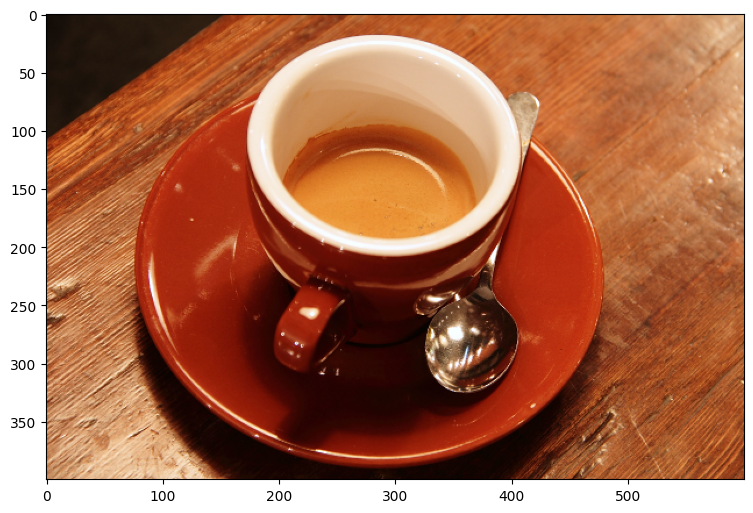

In [3]:
# TODO: Load coffee image from skimage
image_coffee = skimage.data.coffee()

# TODO: Print image shape/dimension
print('Shape of coffee image: {}'.format(image_coffee.shape))

# TODO: Print min and max value of the image using numpy
print('Min and max values of coffee image: {}'.format(
    (np.min(image_coffee), np.max(image_coffee))))

# TODO: Create visualization of coffee image with figure size of 8x8
fig = plt.figure(figsize = (9, 9))

ax = fig.add_subplot(1, 1, 1) #
ax.imshow(image_coffee)

plt.show()

Visualize image of text without axis tickers

Shape of text image: (172, 448)


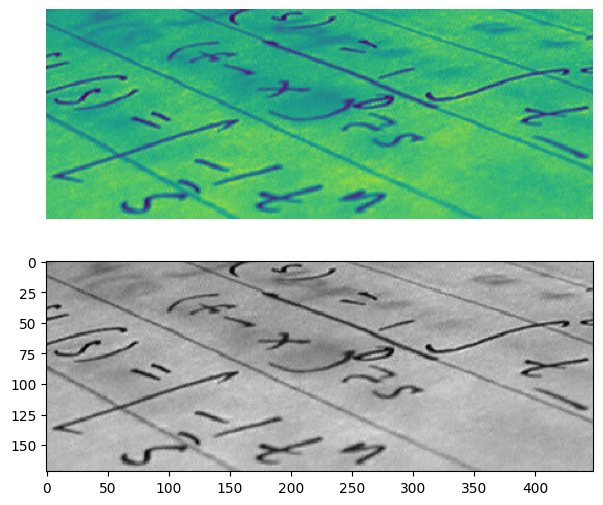

In [4]:
    # TODO: Load text image
image_text = skimage.data.text()

# TODO: Print image shape/dimension
print('Shape of text image: {}'.format(image_text.shape))

# TODO: Create visualization with figure size of 24x6 with 2 subplots
fig = plt.figure(figsize = (24, 6))

# TODO: Display the image in the first subplot
ax = fig.add_subplot(2, 1, 1)
ax.imshow(image_text)

# Note: must use config_plot for full points
config_plot()

# TODO: Display the image using grayscale colormap in second subplot
ax = fig.add_subplot(2, 1, 2)
ax.imshow(image_text, cmap = "gray")

plt.show()

Visualize MRI volume of brain as grayscale images along the channel dimension

Shape of MRI volume of brain: (10, 256, 256)
Min and max values of MRI volume: 0


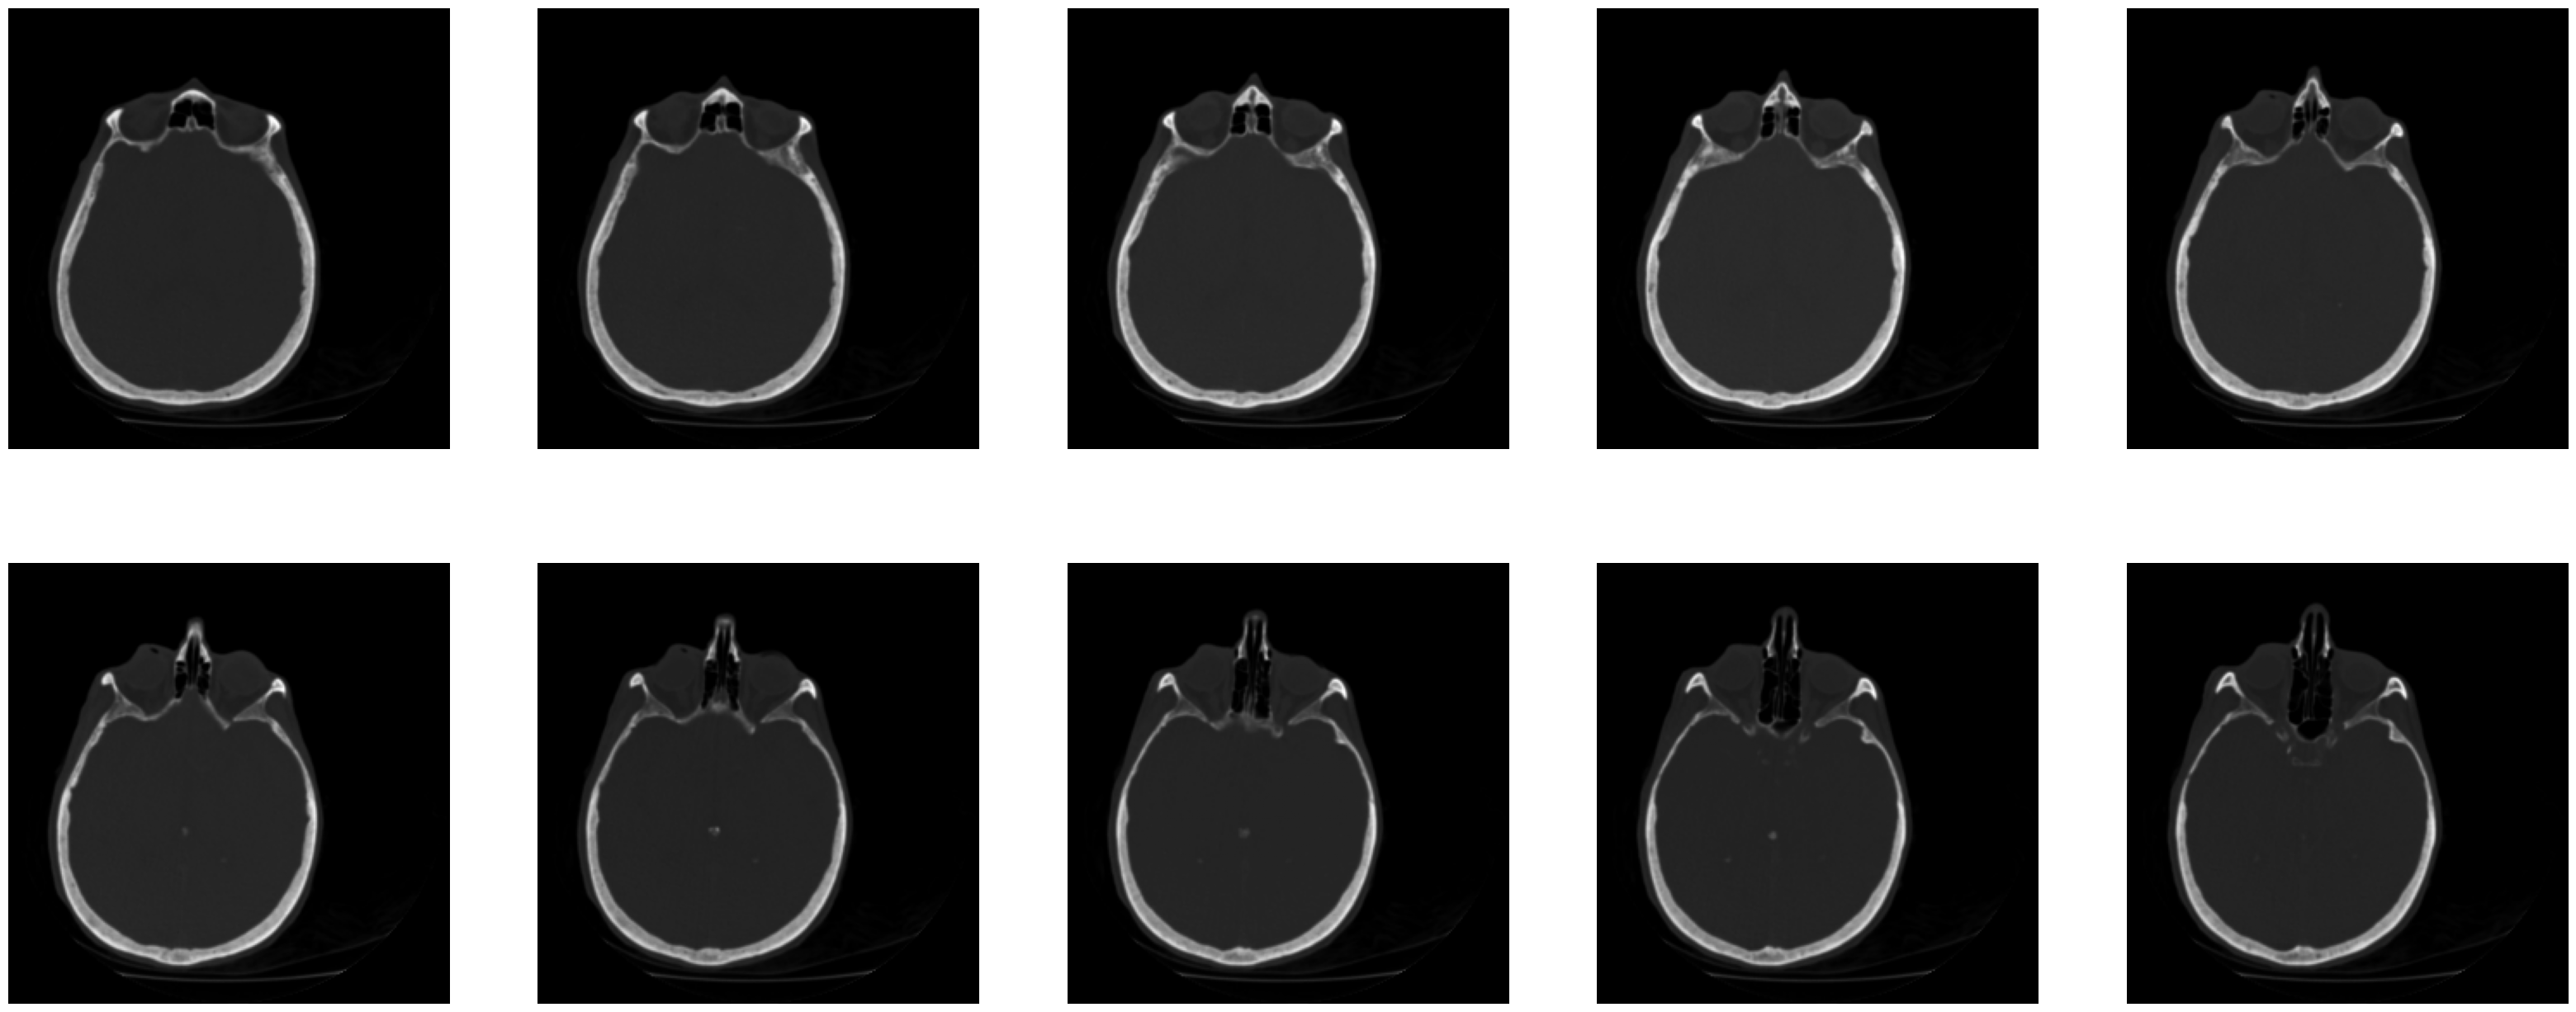

In [5]:
# TODO: Load MRI volume of brain
mri_brain = skimage.data.brain()

# TODO: Print MRI volume shape/dimension
print('Shape of MRI volume of brain: {}'.format(mri_brain.shape))

# TODO: Print min and max value of the image
print('Min and max values of MRI volume: {}'.format(np.min(mri_brain), np.max(mri_brain)))

# TODO: Create a 2x5 grid visualization with figure size of 40x16
fig = plt.figure(figsize = (40, 16))

# TODO: Iterate over the MRI volume and display each slice (image) using grayscale colormap
for i in range(2):
  for j in range(5):
    pass

for imageIndex in range(mri_brain.shape[0]):
  image_slice = mri_brain[imageIndex, ...]
  ax = fig.add_subplot(2, 5, imageIndex + 1) #mathplotlib is not 0 indexed!!!
  ax.imshow(image_slice, cmap = 'gray')
  config_plot()

plt.show()


Visualize the full and 80% center crop of Chelsea

Shape of Chelsea Image: (300, 451, 3)


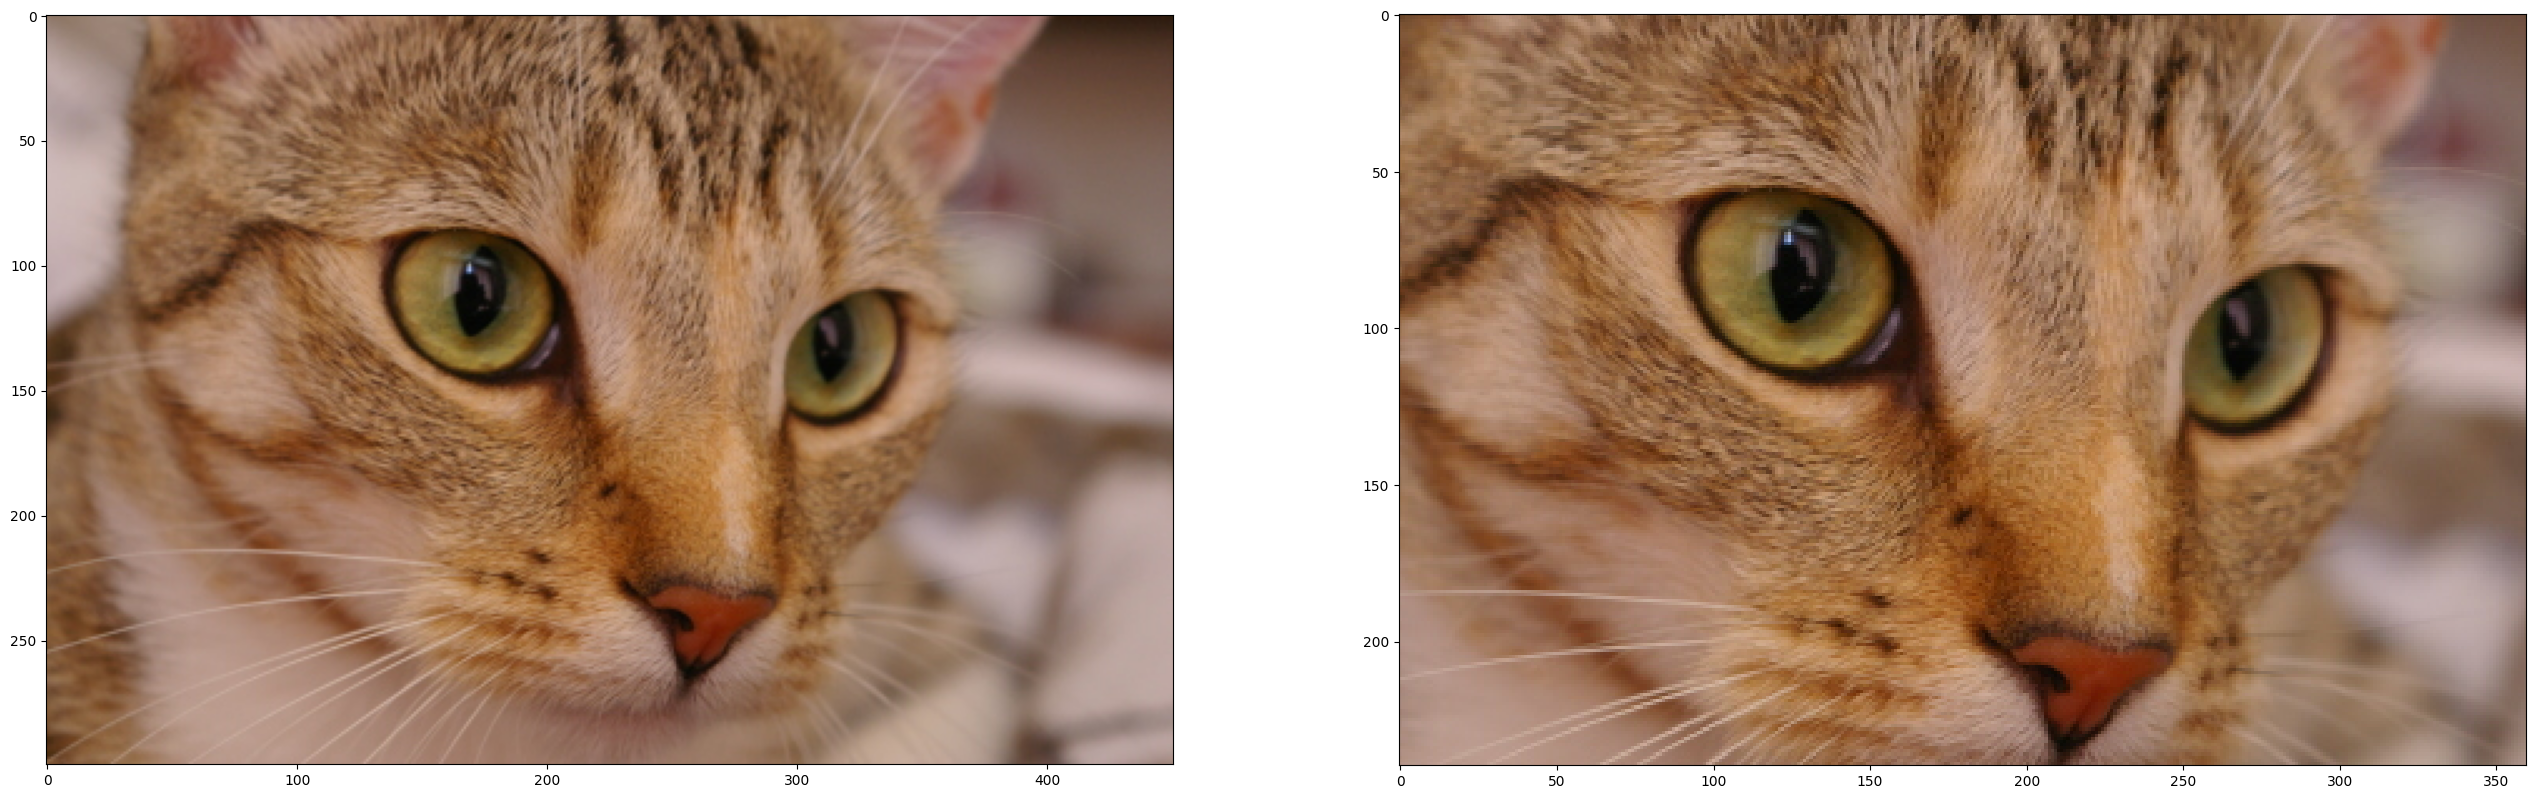

In [6]:
# TODO: Load Chelsea image
image_chelsea = skimage.data.chelsea()

print('Shape of Chelsea Image: {}'.format(image_chelsea.shape))

# TODO: Compute start and end crop locations for x and y directions for 80%
crop_y_start = int(image_chelsea.shape[1]*0.1)
crop_y_end = int(image_chelsea.shape[1]*0.9)
crop_x_start = int(image_chelsea.shape[0]*0.1)
crop_x_end = int(image_chelsea.shape[0]*0.9)

# TODO: Perform 80% center crop on Chelsea image
image_chelsea_crop = image_chelsea[crop_x_start:crop_x_end, crop_y_start : crop_y_end,:]

# TODO: Create a 1x2 grid visualization with figure size of 32x24
fig = plt.figure(figsize=(32, 24))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(image_chelsea)

ax = fig.add_subplot(1, 2, 2)
ax.imshow(image_chelsea_crop)

plt.show()

Shifting and resizing a grayscale Astronaut

In [7]:
def resample_from_image(image_src, image_tgt, xy_src, xy_tgt):
    '''
    Resample target image from source image

    TODO: Refactor resampling code into this function and use it below

    Arg(s):
        image_src : numpy[float32]
            H x W image
        image_tgt : numpy[float32]
            h x w image to be populated
        xy_src : numpy[float32]
            N x 2 coordinates corresponding to source image
        xy_tgt : numpy[float32]
            N x 2 coordinates corresponding to target image
    Returns:
        numpy[float32] : resampled image
    '''

    # TODO: Get height and width of image
    n_height, n_width = image_src.shape

    # TODO: Iterate through each coordinate and resample from the original image
    for uv, uv_translated in zip(xy_src.transpose(), xy_tgt.transpose()):
      #Convert to int for pixels
      uv = uv.astype(np.int32)
      uv_translated = uv_translated.astype(np.int32)

      u, v = uv
      u_trans, v_trans = uv_translated

      if not (u_trans >= n_width or v_trans >= n_height or u_trans < 0 or v_trans < 0):
        image_tgt[v_trans, u_trans] = image_src[v, u]

    return image_tgt

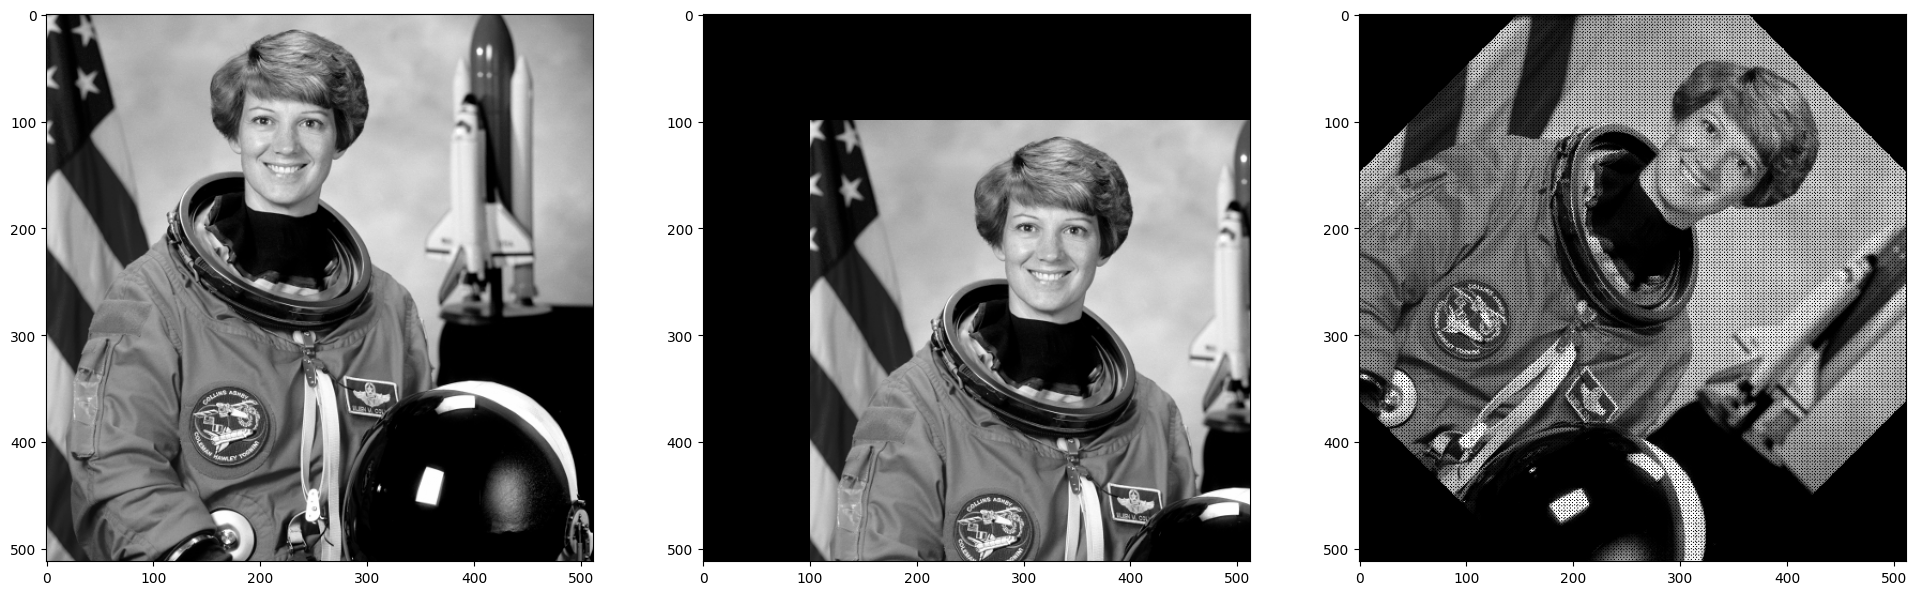

In [8]:
# TODO: Load astronaunt image
image_astronaut = skimage.data.astronaut();

# TODO: Convert astronaunt image to gray
image_astronaut = skimage.color.rgb2gray(image_astronaut)

n_height, n_width = image_astronaut.shape

# TODO: Define a coordinate plane (meshgrid) with the same size as the image
x_grid, y_grid = np.meshgrid(range(n_width), range(n_height), indexing = 'xy')

# TODO: Stack x and y coordinates together
xy_grid = np.stack([x_grid, y_grid], axis = 0).astype(np.float32)

# TODO: Convert the coordinates to homogeneous form and reshape to 3 x N points
ones = np.expand_dims(np.ones_like(x_grid), axis = 0)
xy_grid_h = np.concatenate([xy_grid, ones], axis = 0)
xy_h = np.reshape(xy_grid_h, (3, -1))

# TODO: Shift the origin to the center of the image
x_offset = n_width / 2
y_offset = n_height / 2

xy_h_centered = xy_h.copy()
xy_h_centered[0, ...] -= x_offset
xy_h_centered[1, ...] -= y_offset

# TODO: Define a translation matrix by 100 pixels to the right and 100 pixels upward
translation_matrix = np.array([[1, 0, 100], [0, 1, 100], [0, 0, 1]], dtype = np.float32)

# TODO: Transform the coordinates with translation matrix
xy_h_translated = np.matmul(translation_matrix, xy_h_centered)

# TODO: Shift the origin of the shifted coordinates back to top left corner
xy_h_translated[0, ...] += x_offset
xy_h_translated[1, ...] += y_offset

# TODO: Convert coordinates back to inhomogenous form
xy_translated = xy_h_translated[0:2, ...]

# TODO: Define new image of 0s
image_astronaut_translated = np.zeros_like(image_astronaut)

# TODO: Iterate through each coordinate and resample from the original image
image_astronaut_translated = resample_from_image(image_astronaut, image_astronaut_translated, xy_h[0:2,...], xy_translated)

# Note: for full points, must implement and use resample_from_image
#image_astronaut_translated =

# TODO: Define rotation matrix of 45 degrees
rotation_matrix = np.array([[np.cos(45 * np.pi/180), -np.sin(45 * np.pi/180), 0], [np.sin(45 * np.pi/180), np.cos(45 * np.pi/180), 0], [0, 0, 1]], dtype = np.float32)

# TODO: Transform the coordinates with rotation matrix
xy_h_rotated = np.matmul(rotation_matrix, xy_h_centered)

# TODO: Shift the origin of the shifted coordinates back to top left corner
xy_h_rotated[0, ...] += x_offset
xy_h_rotated[1, ...] += y_offset

# TODO: Convert coordinates back to inhomogenous form
xy_rotated = xy_h_rotated[0:2, ...]

# TODO: Define new image of 0s
image_astronaut_rotated = np.zeros_like(image_astronaut)

# TODO: Iterate through each coordinate and resample from the original image

# Note: for full points, must implement and use resample_from_image
image_astronaut_rotated = resample_from_image(image_astronaut, image_astronaut_rotated, xy_h[0:2, ...], xy_rotated)

# TODO: Create a 1x3 grid visualization with figure size of 24x32
fig = plt.figure(figsize = (24, 32))

# TODO: Display grayscale image in the first subplot
ax = fig.add_subplot(1, 3, 1)
ax.imshow(image_astronaut, cmap = 'gray')

# TODO: Display translated grayscale image in the second subplot
ax = fig.add_subplot(1, 3, 2)
ax.imshow(image_astronaut_translated, cmap = 'gray')

# TODO: Display rotated grayscale image in the third subplot
ax = fig.add_subplot(1, 3, 3)
ax.imshow(image_astronaut_rotated, cmap = 'gray')

plt.show()